# Lab 07: Histogram Equalization
Name: **Raja Hasnain Anwar**<br/>
Registration: **192135**

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('hist2.tif', 0)
img.shape

(500, 500)

## Original Histogram

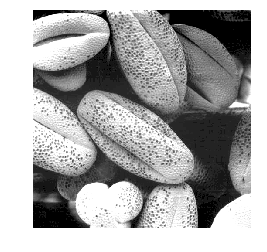

In [3]:
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

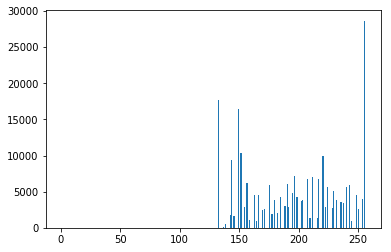

In [4]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

## Histogram Equalization

In [5]:
def hist_eq(img):
    height, width = img.shape
    size = height*width
    L = 256 # gray levels
    counts = [0] * L
    cummulative = [0] * L
    Ts = [0] * L
    
    # getting counts
    for y in range(height):
        for x in range(width):
            px = img[x,y]
            counts[px] += 1

    # converting count to probabilites and cummulating
    for i in range(L):
        if i!= 0:
            cummulative[i] = (counts[i]/size)+cummulative[i-1]
        else:
            cummulative[i] = (counts[i]/size)
            
    # finding T i.e., transformed values
    for i in range(L):
        Ts[i] = cummulative[i]*(L-1)
    
    # redistributing transformed values
    for y in range(height):
        for x in range(width):
            px = img[x,y]
            img[x,y] = round(Ts[px])
    
    return img

## Equalized Histrogram

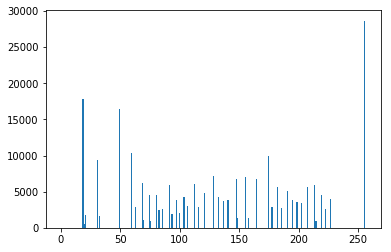

In [6]:
equalized = hist_eq(img.copy())
plt.hist(equalized.ravel(),256,[0,256]); plt.show()

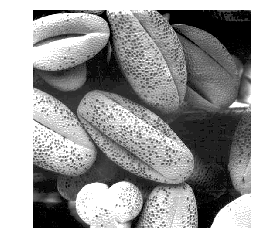

In [7]:
plt.axis('off')
plt.imshow(equalized, cmap='gray')
plt.show()

## Non-Uniform Equalization
In theory, the continuous domain has an infinite number of values in any interval. However, in reality the histogram is discrete which means there is a fixed number of values in a range. When this range is stretched, the number of values in it is maintained. The discrete equalization process merely remaps one intensity value to another; it does not redistribute the intensity values. This means pixels which have equal intensities will still have equal intensities after the process.